In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2
import scipy.stats as sp
from PIL import ImageFont, ImageDraw, Image

# 1. 필터 적용(이어서)

In [19]:
img = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype = 'uint8')

kernel = np.array([[0, 0, 0],      #null filter: 자기 자신을 출력
                  [0, 1, 0],
                  [0, 0, 0]])

In [20]:
filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### 패딩 방식

In [21]:
#OpenCV는 어떤 패딩방식을 쓸까?

kernel = np.array([[1, 1, 1], 
                  [1, 1, 1],
                  [1, 1, 1]])

filtered1 = cv2.filter2D(img, -1, kernel)
print(filtered1)

[[33 36 39]
 [42 45 48]
 [51 54 57]]


In [22]:
kernel = np.array([[1, 0, 0],
                  [0, 0, 0],
                  [0, 0, 0]])

filtered1 = cv2.filter2D(img, -1, kernel)
print(filtered1)

[[5 4 5]
 [2 1 2]
 [5 4 5]]


--> 리플렉션 101 방식이라는 것을 알 수 있다.
- 리플렉션 101: 현재 픽셀을 기준으로 상하좌우 대칭하여 채우는 방식

<table>
    <tr>
        <td>  5  </td>  <td>  4  </td>   <td>  5  </td>  <td>  6  </td>  <td>  5  </td>
    </tr>
    <tr>
        <td>  2  </td>  <td>  1  </td>   <td>  2  </td>  <td>  3  </td>  <td>  2  </td>
    </tr>
    <tr>
        <td>  5  </td>  <td>  4  </td>   <td>  5  </td>  <td>  6  </td>  <td>  5  </td>
    </tr>
    <tr>
        <td>  8  </td>  <td>  7  </td>   <td>  8  </td>  <td>  9  </td>  <td>  8  </td>
    </tr>
    <tr>
        <td>  5  </td>  <td>  4  </td>   <td>  5  </td>  <td>  6  </td>  <td>  5  </td>
    </tr>

In [23]:
img = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype = 'uint8')

kernel = np.array([[0, 0, 0],
                  [1, 0, -1],     #음수를 넣는다면?
                  [0, 0, 0]])

filtered1 = cv2.filter2D(img, -1, kernel)
print(filtered1)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [24]:
img = np.array([[1, 2, 3],
               [200, 5, 200],     #큰 수를 넣는다면?
               [7, 8, 9]], dtype = 'uint8')

kernel = np.array([[0, 0, 0],
                  [1, 0, 1],     
                  [0, 0, 0]])

filtered1 = cv2.filter2D(img, -1, kernel)
print(filtered1)

[[  4   4   4]
 [ 10 255  10]
 [ 16  16  16]]


uint8이 0~255 사이의 값을 갖기 때문에 위의 두 셀과 같은 결과가 나타난다.

In [26]:
img = np.array([[1, 2, 3],
               [200, 5, 200],     
               [7, 8, 9]], dtype = 'float')   #dtype을 float로 변경하면 0~255 밖의 값도 나온다.

kernel1 = np.array([[0, 0, 0],
                  [1, 0, 1],     
                  [0, 0, 0]])

filtered1 = cv2.filter2D(img, -1, kernel1)
print(filtered1)

kernel2 = np.array([[0, 0, 0],
                  [1, 0, -1],     
                  [0, 0, 0]])

filtered2 = cv2.filter2D(img, -1, kernel2)
print(filtered2)

[[  4.   4.   4.]
 [ 10. 400.  10.]
 [ 16.  16.  16.]]
[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [29]:
cv2.imwrite("output.png", filtered2.astype('uint8'))  #영상이기 때문에 형변환을 해주어야 함

True

# 2. 정규화

In [30]:
img = cv2.imread('output.png')

print(img)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


정규화 공식: (기존값 - min) / (max - min)  * 정규화 최댓값

e.g. (2, 5)를 (0, 255)로 정규화
- 5는 (5-2) / (5-2) * 255 = 255
- 2는 (2-2) / (5-2) * 255 = 0
- 3은 (3-2) / (5-2) * 255 = 35

In [42]:
np.ptp(filtered2)    #np.ptp(): 최댓값 - 최솟값

2.0

In [44]:
ma = np.max(filtered2)
mn = np.min(filtered2)

ma - mn

2.0

In [46]:
print(filtered2)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [52]:
mn

-2.0

In [54]:
ma = np.max(filtered2)
mn = np.min(filtered2)

n = (filtered2 - mn) / np.ptp(filtered2) * 255     # -2 ~ 0 -> 0 ~ 255
#n = (filtered2 - mn) / (ma - mn) * 255 
print(n)

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]


In [45]:
n2 = np.abs(filtered2) / np.max(np.abs(filtered2)) * 255    # 0 ~ 2 -> 0 ~ 255
print(n2)

[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]


`normalize()`메소드를 쓰면 간단하게 정규화할 수 있다.
- cv2.normalize(이미지, None, 최소, 최대, 정규화방식)
    - norm = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

In [49]:
norm = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

In [50]:
norm

array([[255,   0, 255],
       [255, 255, 255],
       [255,   0, 255]], dtype=uint8)

# 3. 에지 검출(엠보싱 필터 등)

In [77]:
src = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

src2 = src.astype('int16')    #uint8 타입으로 냅두면 필터 적용 시 자동 클립핑 문제 발생

In [72]:
kernel = np.array([[0, +1, 0],
                  [0, 0, 0],
                  [0, -1, 0]])
filtered = cv2.filter2D(src2, -1, kernel)

print(np.min(filtered), np.max(filtered))

cv2.imwrite("output.png", filtered)

-123.0 162.0


True

필터 적용 결과 음수값이 포함되어있음을 확인할 수 있다 --> uint8로 냅뒀으면 0으로 처리됐을 것

<img src=output.png>

원하는대로 저장되지 않았다 --> 정규화를 하지 않았기 때문!

In [78]:
#숫자를 직접 더해주는 방식으로 노멀라이즈
kernel = np.array([[0, +1, 0],
                  [0, 0, 0],
                  [0, -1, 0]])
filtered = cv2.filter2D(src2, -1, kernel) + 128   #음수 처리해주기

print(np.min(filtered), np.max(filtered))

cv2.imwrite("output.png", filtered)

5 290


True

<img src=output.png?3141245>

원하는대로 저장되었다!

In [79]:
#normalize()메소드를 활용해서 노멀라이즈
filtered2 = cv2.filter2D(src2, -1, kernel)
filtered2 = cv2.normalize(filtered2, None , 0, 255, cv2.NORM_MINMAX)

print(np.min(filtered))
print(np.max(filtered))
print(np.min(filtered2))
print(np.max(filtered2))

cv2.imwrite("output2.png", filtered2)

5
290
0
255


True

<img src=output2.png?2634>

In [80]:
src = cv2.imread('shape.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0, +1, 0],      #무슨 필터일까? ---> 수평 검출 필터
                  [0, 0, 0],
                  [0, -1, 0]])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite('output3.png', filtered)

True

<img src=output3.png>

수직 에지가 죄다 사라졌다.

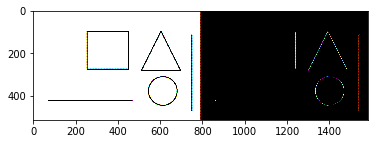

In [87]:
src = cv2.imread('shape.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0, 0, 0],        #무슨 필터일까? ---> 수직 검출 필터
                  [+1, 0, -1],
                  [0, 0, 0]])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite('output4.png', filtered)

all = np.hstack([src, filtered.astype('uint8')])
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BAYER_BG2RGB))

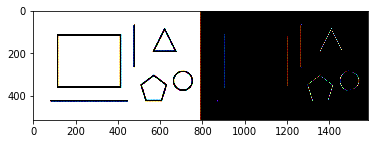

In [88]:
src = cv2.imread('shape2.png', cv2.IMREAD_GRAYSCALE)   #선 굵기와 무관하게 수직 에지만 검출
src2 = src.astype('int16')

kernel = np.array([[0, 0, 0], 
                  [+1, 0, -1],
                  [0, 0, 0]])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite('output5.png', filtered)

all = np.hstack([src, filtered.astype('uint8')])
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BAYER_BG2RGB))

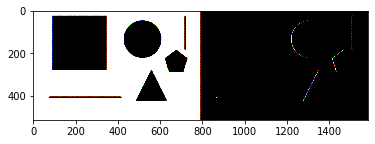

In [89]:
src = cv2.imread('shape3.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0, 0, 0],
                  [+1, 0, -1],
                  [0, 0, 0]])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite('output6.png', filtered)

all = np.hstack([src, filtered.astype('uint8')])
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BAYER_BG2RGB))

# 에지 검출

- 미분을 이용한다
    - 미분: 간단히 말해서 좌우(상하)의 차이를 이용하는 것
    
- 수평/수직 에지 검출 마스크를 한번씩 적용해서 얻은 영상 2개를 합쳐서 최종 에지 영상 생성

<img src=edge.png>

- 다양한 마스크
    - 로버츠
    - 소벨
    - 프리윗
    
<img src=mask_type.png>

2차 미분..... 라플라시안...... 이해못해.....

# 4. 각종 필터들

## 4-1 가우시안

`GaussianBlur()`메소드를 통해 구현할 수 있다.
- cv2.GaussianBlur(이미지, (강도, 강도), 0)

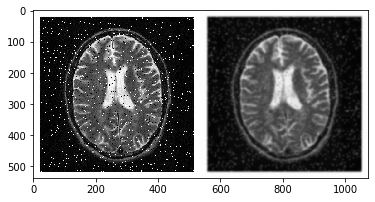

In [93]:
img = cv2.imread('brain.png')
gauss = cv2.GaussianBlur(img, (15, 15), 0)    #(15, 15)는 블러 강도

plt.imshow(np.hstack([img, gauss]))

노이즈가 꽤 해결되었다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


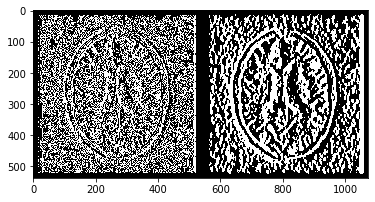

In [99]:
#엣지필터 적용해보기: 가우시안 전/후

out1 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)   #cv2.CV_64F는 uint8을 float 타입으로 변환해서 계산하라는 뜻
out2 = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize = 3)

plt.imshow(np.hstack([out1, out2]))

가우시안 처리를 한 것(오른쪽)이 조금 더 낫기는 하지만 딱히 마음에 들지는 않는다.

--> median 필터로 처리 (median은 mean에 비해 이상치에 강하기 때문)

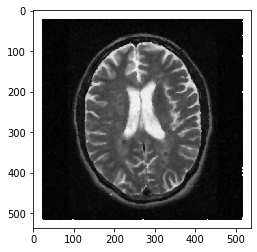

In [97]:
#미디언필터 적용해보기
median = cv2.medianBlur(img, 5)

plt.imshow(median)

엄청나게 깨끗하다. 마음에 든다.

--> 노이즈 특성에 따라 가우시안/미디언필터를 골라서 사용한다.

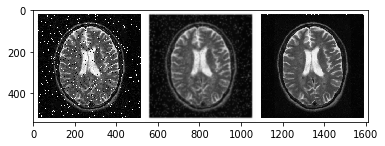

In [100]:
# 세 이미지 비교 (원본, 가우시안, 미디언)
plt.imshow(np.hstack([img, gauss, median]))